In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input/fruit-images-for-object-detection/train_zip/train'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
# 필요한 모듈 임포트
import pandas as pd
import numpy as np
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import os
import cv2
import matplotlib.pyplot as plt
from keras import optimizers
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense,Activation,AveragePooling2D,MaxPooling2D,Dropout,BatchNormalization

Using TensorFlow backend.


In [3]:
# train을 train-val으로 나누기 위한 모듈 임포트
from sklearn.model_selection import train_test_split

np.random.seed(42)

In [4]:
# train set 불러와서 reshape 수행 후 train-val set 으로 나누기
# matplotlib은 RGB, 저장된 이미지는 BGR순이므로 cv2모듈을 이용해 바꿔주기
# 그래야 파란색 이미지로 안나옴
train_images = []       
train_labels = []
shape = (200,200)  
train_path = '../input/fruit-images-for-object-detection/train_zip/train'

for filename in os.listdir('../input/fruit-images-for-object-detection/train_zip/train'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))
        
        # Spliting file names and storing the labels for image in list
        train_labels.append(filename.split('_')[0])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        train_images.append(img)

# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values

# Converting train_images to array
x_train = np.array(train_images)

# train-val으로 나누는건 아직 완성이 안됨
# # Splitting Training data into train and validation dataset
# x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=42)
# y_train_encoded=


In [5]:
# print(len(x_train),len(x_val))

In [6]:
print(x_train.shape)

(240, 200, 200, 3)


In [7]:
print(train_labels.shape)

(240, 4)


In [8]:
# test set 도 동일한 과정 거치기
test_images = []
test_labels = []
shape = (200,200)
test_path = '../input/fruit-images-for-object-detection/test_zip/test'

for filename in os.listdir('../input/fruit-images-for-object-detection/test_zip/test'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        
        # Spliting file names and storing the labels for image in list
        test_labels.append(filename.split('_')[0])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        test_images.append(img)
        
# Converting test_images to array
x_test = np.array(test_images)

In [9]:
print(x_test.shape)

(60, 200, 200, 3)


[1 0 0 0]


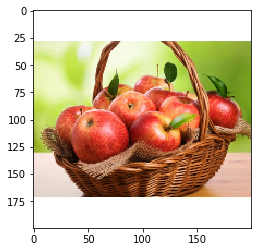

In [10]:
# one hot encoding과 데이터가 일치하는지 확인하는 과정
# 참고로 0은 apple, 1은 banna, 2는 mixed, 3은 orange
print(train_labels[0])
plt.imshow(x_train[0])

In [11]:
# 모델 구축
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', input_shape=(200,200,3,)))

model.add(Conv2D(filters=32,kernel_size = (3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size = (3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size = (3,3),activation='relu'))

model.add(Flatten())

model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(4,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 196, 196, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 48, 48, 64)       

In [13]:
# 모델 훈련
# 원래 epoch 50인데 30으로 줄임
history = model.fit(x_train,train_labels,epochs=30,batch_size=50)

Epoch 1/30
240/240 [==============================] - 19s 81ms/step - loss: 718.8208 - acc: 0.2708
Epoch 2/30
240/240 [==============================] - 19s 80ms/step - loss: 46.8554 - acc: 0.3125
Epoch 3/30
240/240 [==============================] - 18s 76ms/step - loss: 4.7786 - acc: 0.3625
Epoch 4/30
240/240 [==============================] - 18s 77ms/step - loss: 1.4624 - acc: 0.3500
Epoch 5/30
240/240 [==============================] - 19s 79ms/step - loss: 1.1506 - acc: 0.5000
Epoch 6/30
240/240 [==============================] - 19s 78ms/step - loss: 1.1495 - acc: 0.4583
Epoch 7/30
240/240 [==============================] - 19s 78ms/step - loss: 1.1293 - acc: 0.5000
Epoch 8/30
240/240 [==============================] - 19s 79ms/step - loss: 1.0829 - acc: 0.5417
Epoch 9/30
240/240 [==============================] - 19s 78ms/step - loss: 1.0306 - acc: 0.5500
Epoch 10/30
240/240 [==============================] - 18s 77ms/step - loss: 0.9797 - acc: 0.6958
Epoch 11/30
240/240 [=====

In [14]:
# input이 4차원이어야하기때문에 전자와 같은 형식으로 넣어줌
print(x_test[0:60].shape, x_test[0].shape)

(60, 200, 200, 3) (200, 200, 3)


In [15]:
print(len(x_test),len(output))

NameError: name 'output' is not defined

In [16]:
# Testing predictions and the actual label
checkImage = x_test
checklabel = test_labels
# checklabel_encoded = pd.get_dummies(checklabel).values

predict = model.predict(checkImage)
predict_arr=[]

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}
for i in range(len(x_test)):
    predict_arr.append(output[np.argmax(predict[i])])

In [17]:
#test 정확도
print(checklabel)
print("\n")
print(predict_arr)

['orange', 'banana', 'banana', 'apple', 'banana', 'banana', 'apple', 'banana', 'orange', 'banana', 'apple', 'orange', 'mixed', 'apple', 'apple', 'orange', 'orange', 'apple', 'orange', 'banana', 'orange', 'orange', 'apple', 'orange', 'apple', 'mixed', 'orange', 'mixed', 'apple', 'banana', 'apple', 'banana', 'apple', 'orange', 'banana', 'mixed', 'banana', 'orange', 'apple', 'banana', 'banana', 'orange', 'orange', 'orange', 'banana', 'apple', 'apple', 'apple', 'banana', 'apple', 'apple', 'mixed', 'orange', 'orange', 'banana', 'apple', 'banana', 'orange', 'apple', 'banana']


['orange', 'banana', 'banana', 'apple', 'orange', 'orange', 'apple', 'banana', 'apple', 'apple', 'apple', 'orange', 'orange', 'apple', 'apple', 'orange', 'apple', 'apple', 'orange', 'banana', 'orange', 'orange', 'apple', 'orange', 'apple', 'orange', 'apple', 'banana', 'apple', 'banana', 'apple', 'banana', 'apple', 'orange', 'orange', 'apple', 'orange', 'apple', 'apple', 'orange', 'orange', 'orange', 'apple', 'banana',

In [18]:
# test 정확도 수치화
print(np.mean(np.array(checklabel)==np.array(predict_arr)))

0.6166666666666667


In [19]:
# 데이터셋이 너무 적음.
# val set이 없어 정확한 판단 X
# imagegenarator로 이미지 수 늘리고 val 만들고 더 큰 network 구성